In [1]:
import sys
sys.path.append("../") # go to parent dir

from pathlib2 import Path

import random
from load_data import load_data
from test_instances.ts_test import TSTest
from test_instances.fair_sd_ts_test import FairSDTest
from test_instances.sd_ts_test import SDTest
import numpy as np
import pickle

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})


import os
import plot.plot_data_seperated as plt_sep

import matplotlib.pyplot as plt

def plot_all(test_cases):
    plt_sep.plot_delta_subjective_fair(test_cases)
    plt_sep.plot_subjective_min_e1(test_cases)
    plt_sep.plot_delta_smooth_fair(test_cases)
    plt_sep.plot_min_e1(test_cases)
    plt_sep.plot_average_total_regret(test_cases)
    plt_sep.plot_fairness_regret(test_cases)


def save_plot(name):
    i = 0
    name = 'fin_sep_data_' + name
    name_i = name + '_' + format(i) + '.png'
    while Path('/Users/antonm/Desktop/BachelorThesis/Plots/'+name_i).exists():
        i += 1
        name_i = name + '_' + format(i) + '.png'
    plt.savefig('/Users/antonm/Desktop/BachelorThesis/Plots/'+ name_i, bbox_inches='tight')


In [2]:

def plot_subjective_min_e1(test_cases  ):
    T = test_cases[0].T
    x = range(T)

    for test_ind, test in enumerate(test_cases):
        if test.name == 'Fair SD TS':
            continue
        for e2_ind, e2 in enumerate(test.e2_arr):
            for delta_ind, delta in enumerate(test.delta_arr):
                if ALL or (e2 in E2_SELECTION and delta in DELTA_SELECTION and not((e2,delta) in LEAVE_OUT)):
                        algo_name = test.get_label_name(delta=delta, e2=e2)
                        plt.plot(x, test.subjective_min_e1[e2_ind, delta_ind],label=algo_name)

    plt.xlabel('$t$')
    plt.ylabel('min $\epsilon_1$ for $(\epsilon_1, \epsilon_2, \delta)-subjective fairness$')
    name = 'subjective_min_e1_{}_'.format(T)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    save_plot(name)
    plt.show()
#$(\epsilon_1, \epsilon_2, \delta)-

In [3]:
def get_tests(folder):
    ts_test = np.empty(4, dtype=object)
    sd_ts_test = np.empty(4, dtype=object)
    fair_sd_ts_test = np.empty(4, dtype=object)
    for i in range(4):
        ts_test[i] = []
        sd_ts_test[i] = []
        fair_sd_ts_test[i] = []
    for file in os.listdir("/Users/antonm/PycharmProjects/Fairness_in_Bandits/"+folder):
        if file.endswith(".file"):
            with open(os.path.join("/Users/antonm/PycharmProjects/Fairness_in_Bandits/"+folder, file), "rb") as f:
                test = pickle.load(f) 
                if test.T >= end_index and test.n_iter == n_iter:
                    if test.bandits.data_set_name == 'D0':
                        d = 0
                    elif test.bandits.data_set_name == 'D1':
                        d = 1
                    elif test.bandits.data_set_name == 'D2':
                        d = 2
                    elif test.bandits.data_set_name == 'D3':
                        d = 3
                    if test.name == 'TS':
                        ts_test[d].append(test)
                    elif test.name == 'SD  TS' or test.name == 'SD TS':
                        sd_ts_test[d].append(test)

                    elif test.name == 'Fair SD TS':
                        fair_sd_ts_test[d].append(test)

                    else:
                        print 'unknwown test name'
    return ts_test, sd_ts_test, fair_sd_ts_test

def plot_s_smooth(d, s=False, mi=True, ts=1, sd=1, fair=1):
    test_cases = []
    if ts:
        test_cases += ts_test[d] 
    if sd:
        test_cases += sd_ts_test[d] 
    if fair:
        test_cases += fair_sd_ts_test[d] 

    if s:
        plot_delta_smooth_fair(test_cases)
    if mi:
        plot_subjective_min_e1(test_cases)

    

In [4]:
T = 500
n_iter = 50.
end_index=T
folder_normal = 'normal_objects/new_normal_objects/'+str(T)
ts_test, sd_ts_test, fair_sd_ts_test = get_tests(folder_normal)


In [5]:
ALL = True
ALL_E1 = True 
E1_SELECTION = []
E2_SELECTION = [0.2, 0.4] #0.02
DELTA_SELECTION = [0.05, 0.2, 0.4]
LEAVE_OUT = [(0.2,0.4) ]
LEAVE_OUT = []

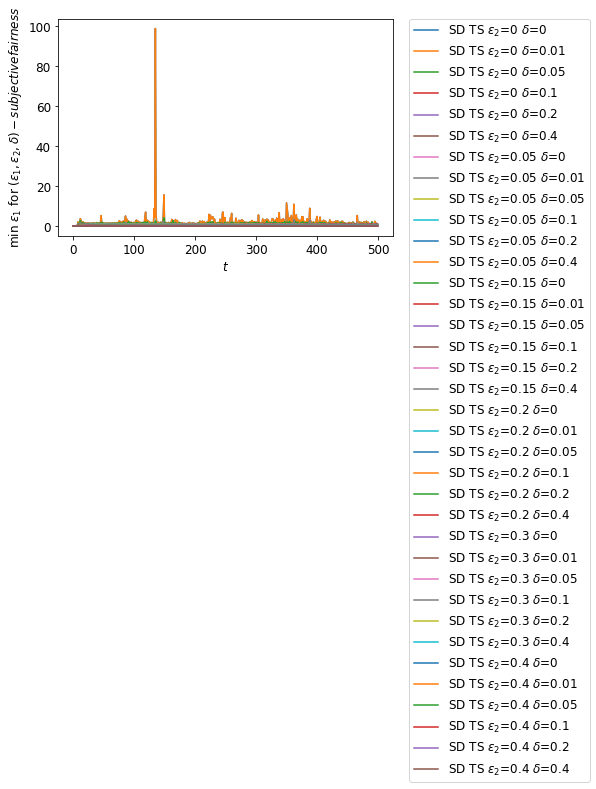

In [6]:
plot_s_smooth(0, ts=0)

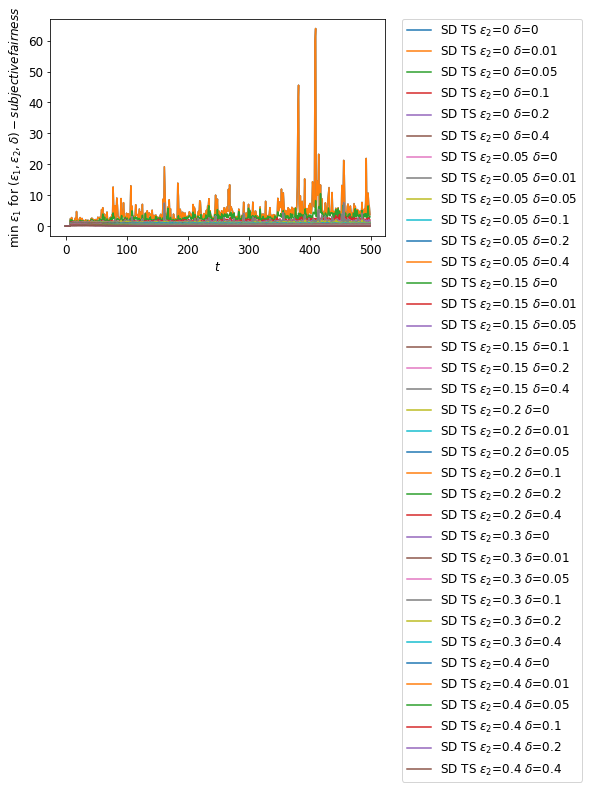

In [7]:
plot_s_smooth(1, ts=0)

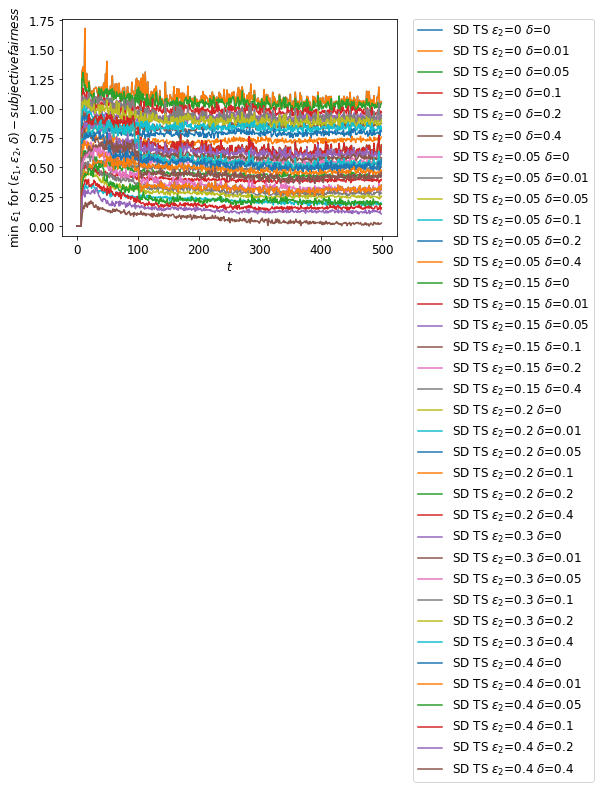

In [8]:
plot_s_smooth(2, ts=0)

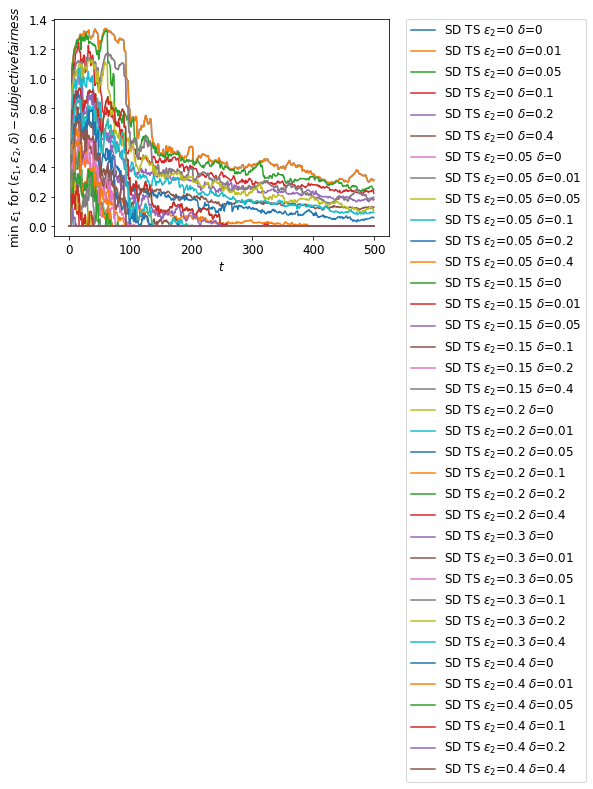

In [9]:
plot_s_smooth(3, ts=0)